# Salary Prediction based on Country and Race

The objective of this project is to forecast the income of individuals from diverse countries and races by considering their demographic information, including occupation, age, gender, experience, education, and more. The dataset used for this project is sourced from Kaggle and consists of 32,561 rows and 15 columns. Within the dataset, there are 8 independent variables and 1 target variable, which is the salary.

### About the dataset

The dataset contains a wide range of salary and demographic information, including details on years of experience. It is a valuable resource for examining the relationship between income and socio-demographic factors. The demographic attributes encompass age, gender, education, country, and race, providing a diverse set of variables for analysis. Researchers can investigate income distribution patterns across different demographic categories, gaining insights into potential disparities or variations in earning potential. Additionally, the dataset includes the important dimension of professional tenure, allowing researchers to explore how salary levels are affected by years of experience. This adds a dynamic element to the analysis, enabling a comprehensive examination of how income varies based on both demographic characteristics and accumulated work experience. Overall, the dataset offers a rich opportunity for in-depth studies on income diversity and a deeper understanding of the complex factors that influence earning potential in today's workforce.

### Data Dictionary

|Column|Description|
|---|---|
|Unnamed: 0|Index|
|Age|Age of the employee|
|Education Level|Education level of the employee|
|Job Title|Job title of the employee|
|Years of Experience|Years of experience of the employee|
|Salary|Salary of the employee|
|Country|Country of the employee|
|Race|Race of the employee|

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
os.chdir("D:\python")

In [4]:
#loading the data
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


## Data Preprocessing

In [6]:
#checking the shape of the data
df.shape

(6704, 9)

In [7]:
#checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null or missing value is very less as compared to the total number of rows. Hence,these rows will be dropped.

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [10]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

Checking data type of each column

In [11]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Checking for unique values in each column

In [12]:
#unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

The job title column has 191 different values. It will be very difficult to analyze so many job titles. So, I grouping the job titles under similar job domains.

####  Grouping Job Titles

In [13]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [16]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Data Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [31]:
df['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. Hence, grouping it with Bachelor

#### Grouping Education Level

In [18]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

#### Descriptive Statistics

In [19]:
#descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [20]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Data Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

### Pie chart for Gender

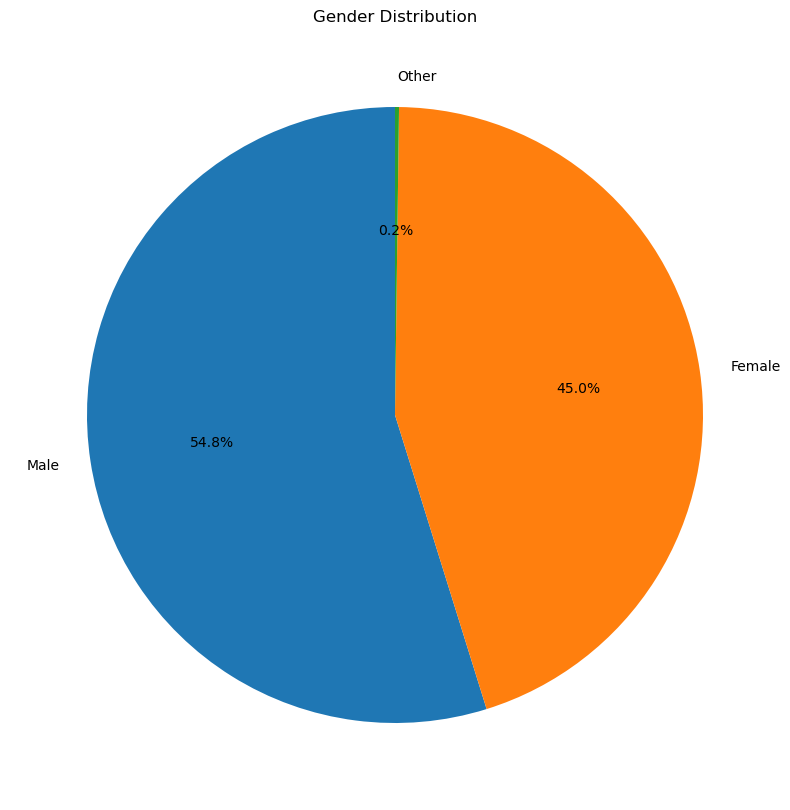

In [88]:
#pie chart
plt.figure(figsize=(20,10))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart shows that  on the dataset majority of the employees are male with 54.8 % , followed by females with 45% and 0.2% employees belong to other gender.

### Age Distribution

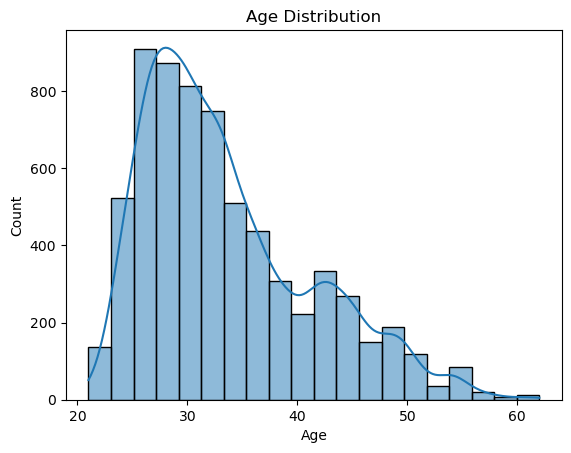

In [23]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

### Education Level

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

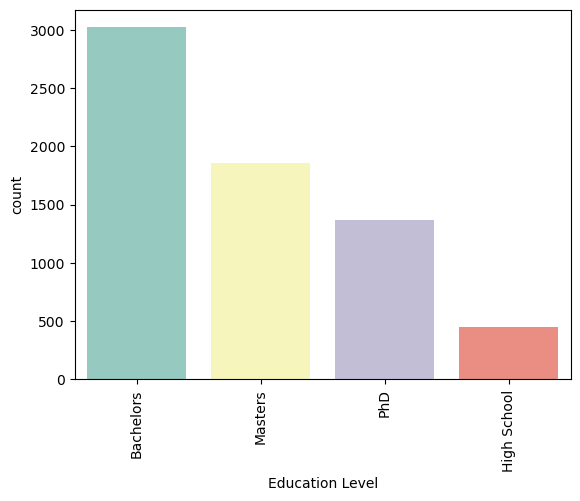

In [28]:
sns.countplot(x = 'Education Level', data = df, palette='Set3')
plt.xticks(rotation=90)

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

### Job Title

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Data Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

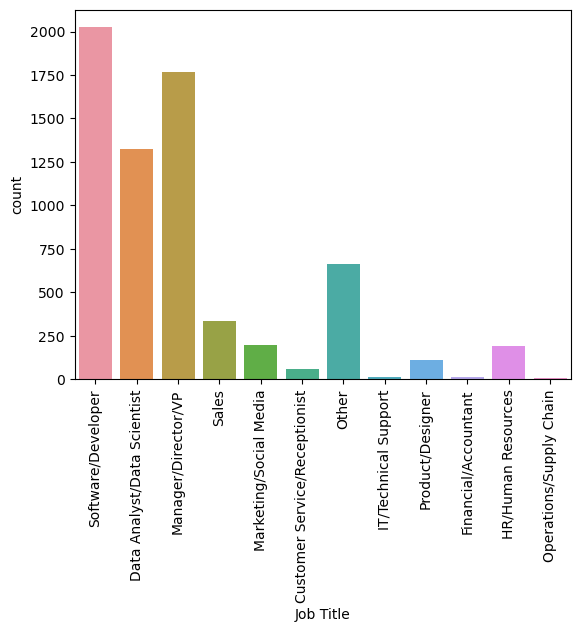

In [32]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software/Developer, Data Analyst/Scientist or Manager/Director/VP. Some of employees have job titles such as Sales, Marketing/Social Media, HR, Product Designer and Customer Service. Very few of the employees work as a Financial/Accountant or Operation/Supply Management.

From this a hypothesis is derived that the job titles such as Software/Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/Accountant or Operation/Supply Management and Customer Service are in less demand and paid comparatively less.

### Years of Experience

<AxesSubplot:xlabel='Years of Experience', ylabel='Count'>

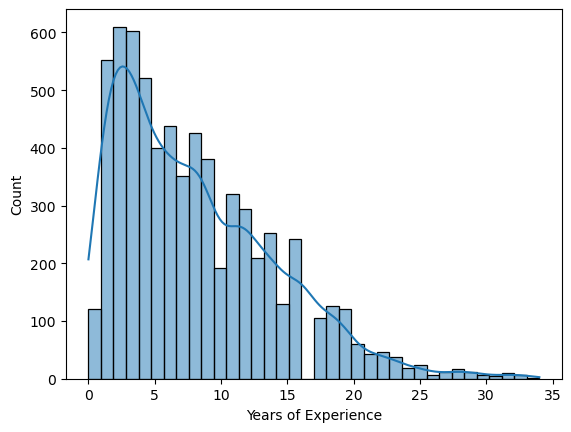

In [33]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

In the dataset, the majority of employees have less than 5 years of experience in their respective domains, with the most common range being 0-7 years. Additionally, as the number of years of experience increases, the number of employees in the dataset decreases.

### Country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

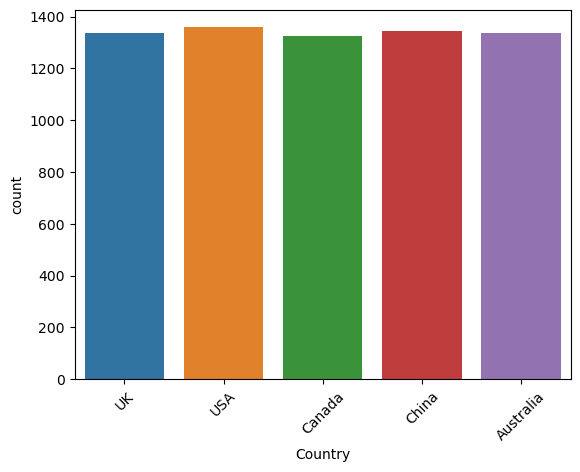

In [35]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=45)

The employee count across the five mentioned countries is relatively similar, with slightly more employees in the USA.

### Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

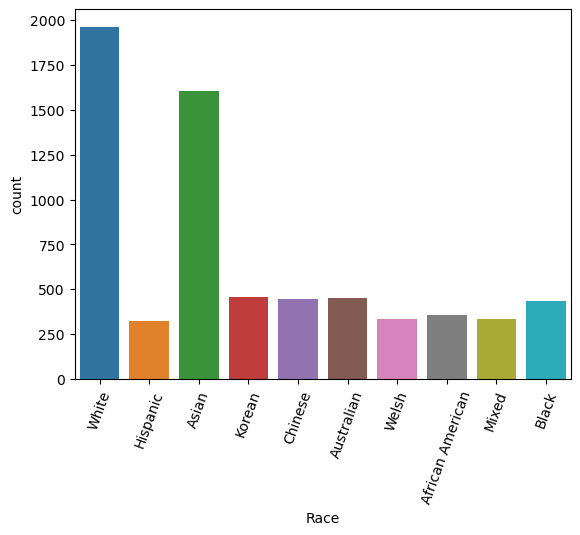

In [39]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=70)

This graph provides insights into the racial composition of the dataset. It is evident from the graph that the majority of employees belong to the White or Asian racial groups, followed by Korean, Chinese, Australian, and Black. On the other hand, the number of employees from Welsh, African American, Mixed, and Hispanic races is relatively lower compared to the other groups.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now coming to the relation of these independent variables with the target Variable i.e. Salary.

### Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

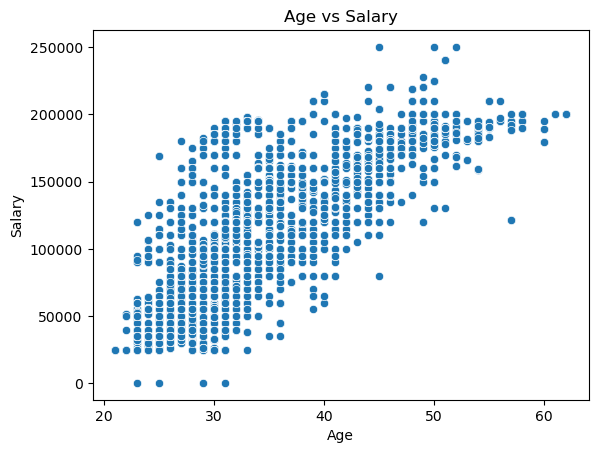

In [40]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

In this scatter plot, we observe a correlation between age and salary, where an increase in age generally corresponds to higher salaries, which is expected due to promotions and appraisals. However, upon closer examination, it becomes apparent that individuals of the same age may have different salaries, indicating that there are additional factors that influence salary determination.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

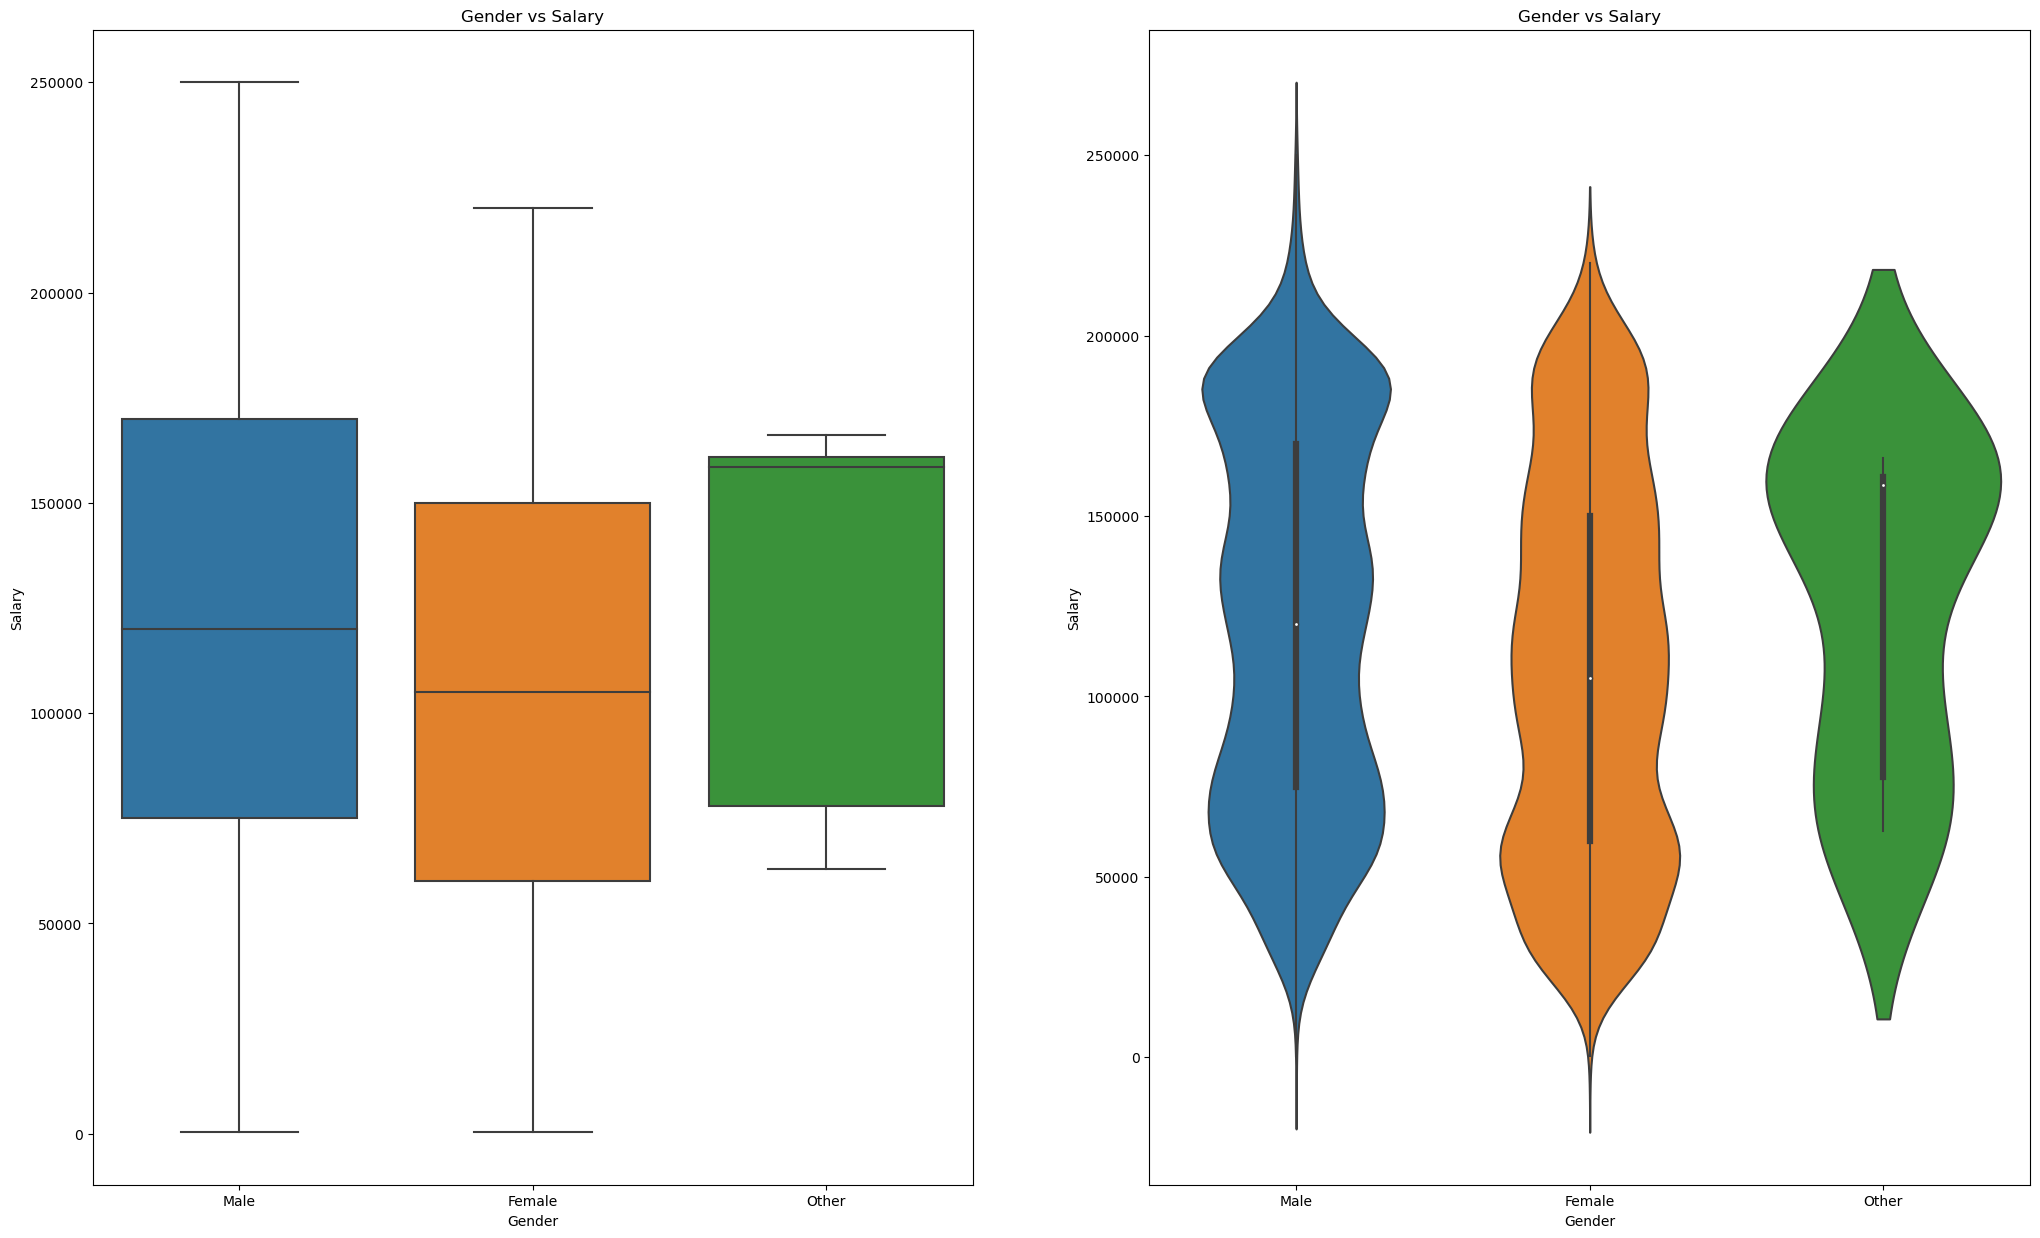

In [42]:
fig, ax = plt.subplots(1,2, figsize = (25, 15))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from Other gender has quite high salary as compared to Makes and Females. The other gender employees have a median salary above 150000, followed by males with median salary near 107500 and females with median salary near 100000. The voilin plot visualizes the distribution of salary with respect to the gender, where most of the Other gender employees have salary above 150000. In makes this distribution is concentrated between 50000 and 10000 as well as near 200000. In case of females, there salary distribution is quite spread as compared to other genders with most near 50000.

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

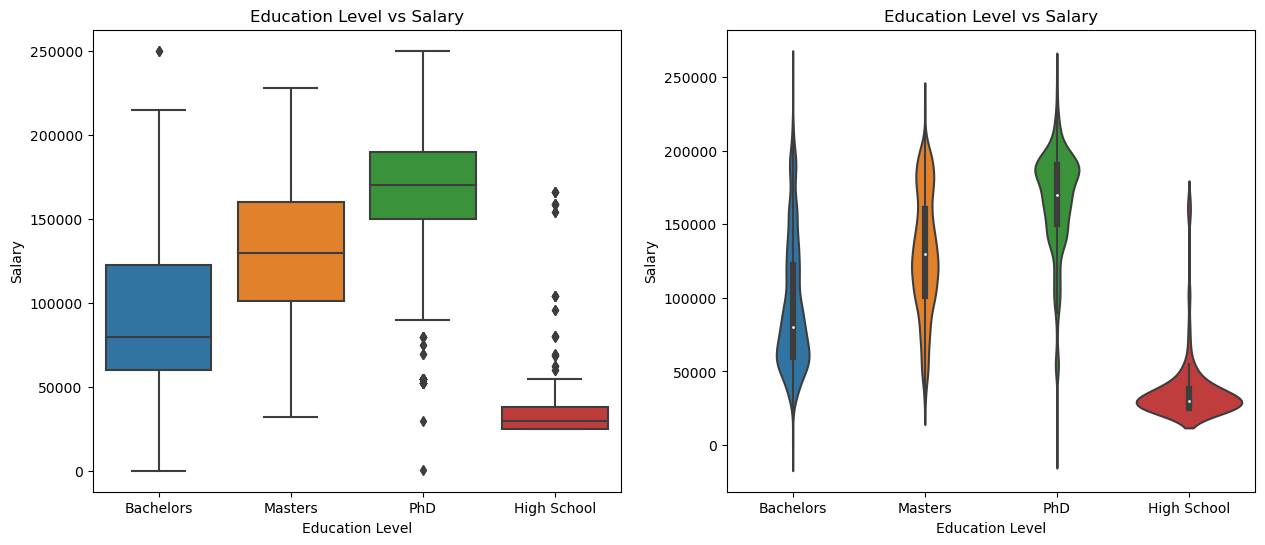

In [43]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the PhD holders is highest followed by Masters and Bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the PhD scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

### Job Title and Salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Data Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

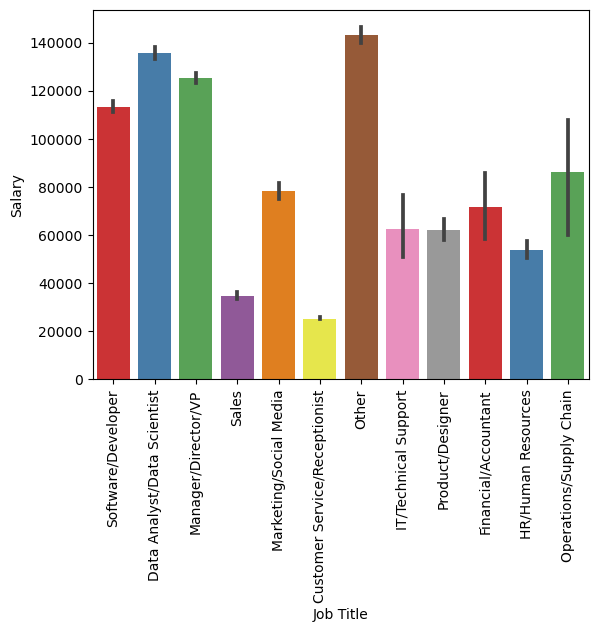

In [44]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'Set1')
plt.xticks(rotation = 90)

This graph falsifies the previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software/Developer, Data Analyst/Scientist and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast the job titles such as Operation/Supply Chain, HR, Financial/Accountant and Marketing/Social Media are found to have much more salary as assumed.

### Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

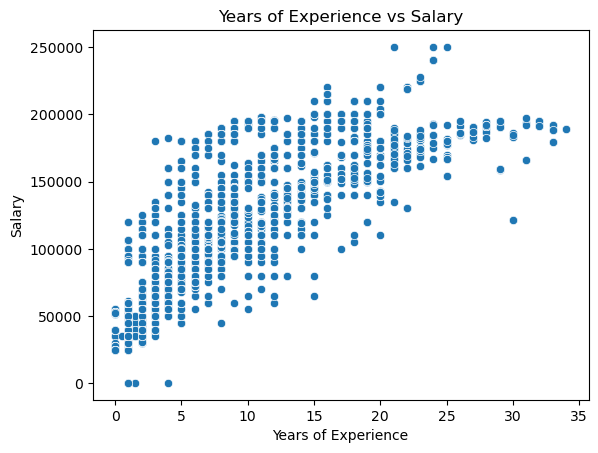

In [46]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

From analyzing this scatterplot, it becomes evident that, in general, the salary of employees tends to rise in proportion to their years of experience. However, upon closer examination, it becomes apparent that individuals with similar levels of experience may have varying salaries. This can be attributed to the influence of other factors such as job title, age, gender, and education level, which were previously discussed.

### Country and Salary

<AxesSubplot:xlabel='Country', ylabel='Salary'>

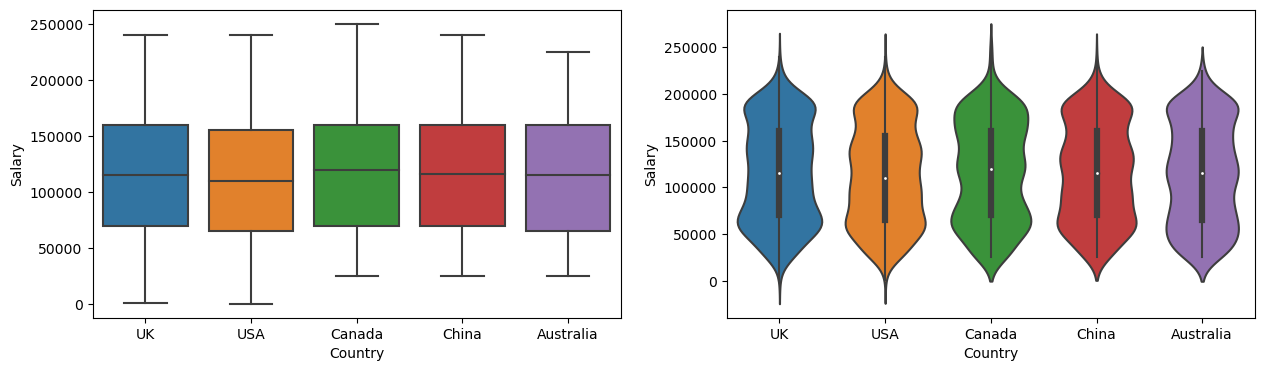

In [47]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, we cannot get much information about the salary with respect to the countries. So, I will plot the Job Title vs Salary graph for each country, so that we can get a overview of Job Title vs Salary for each country.

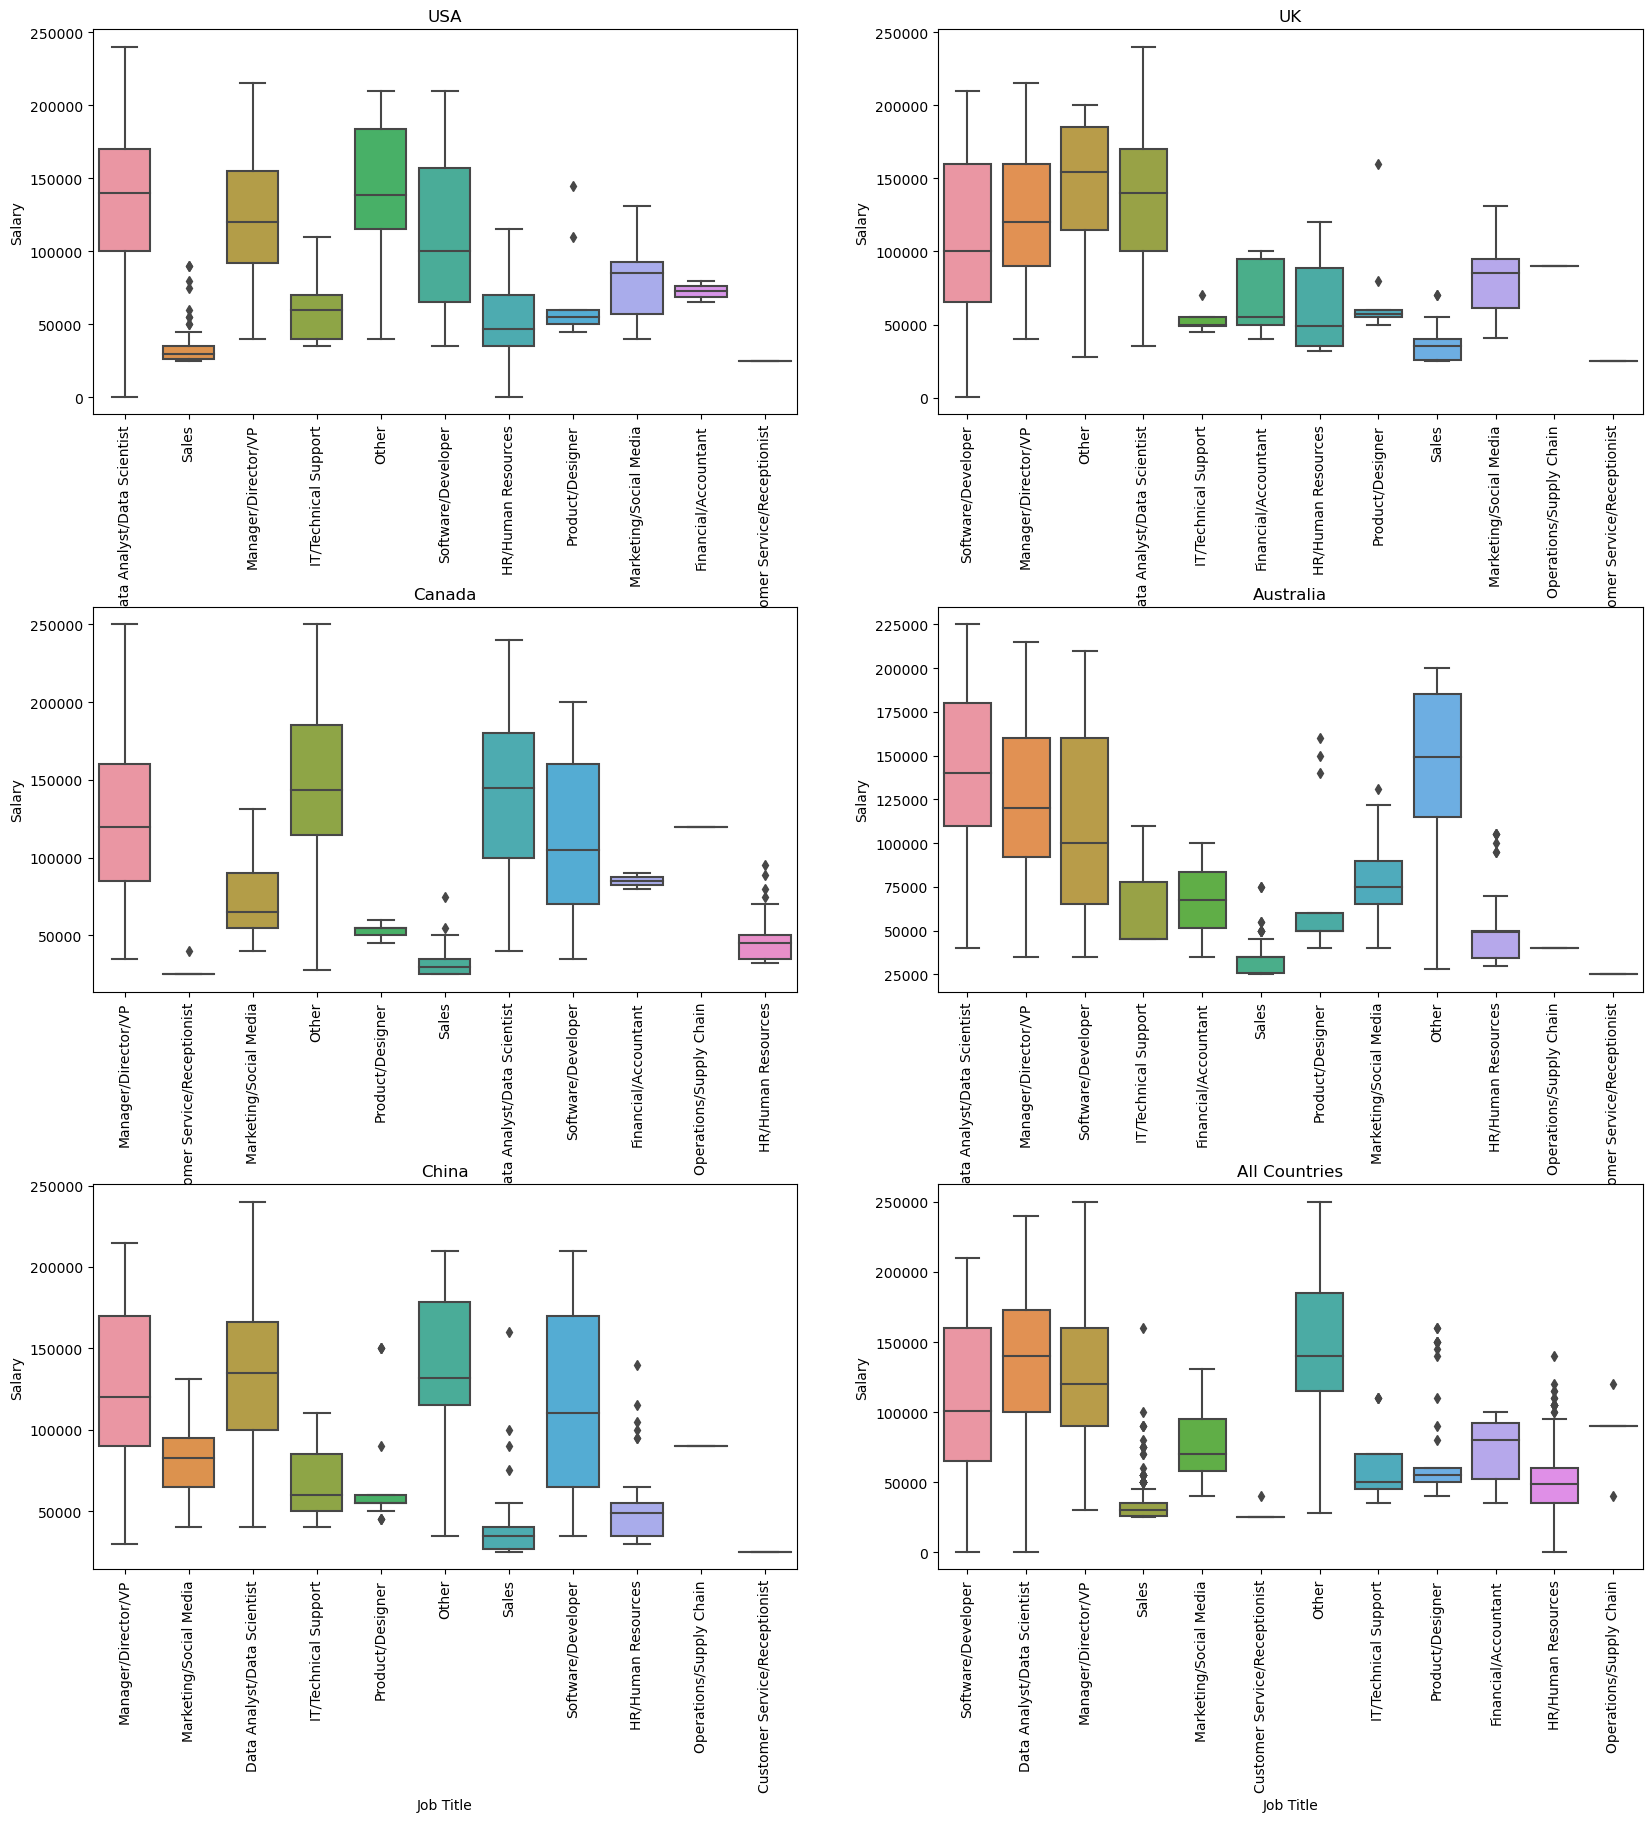

In [48]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the Job Titles such as Software/Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product/Designer and Sales are in low demand and have low salary.

### Race and Salary

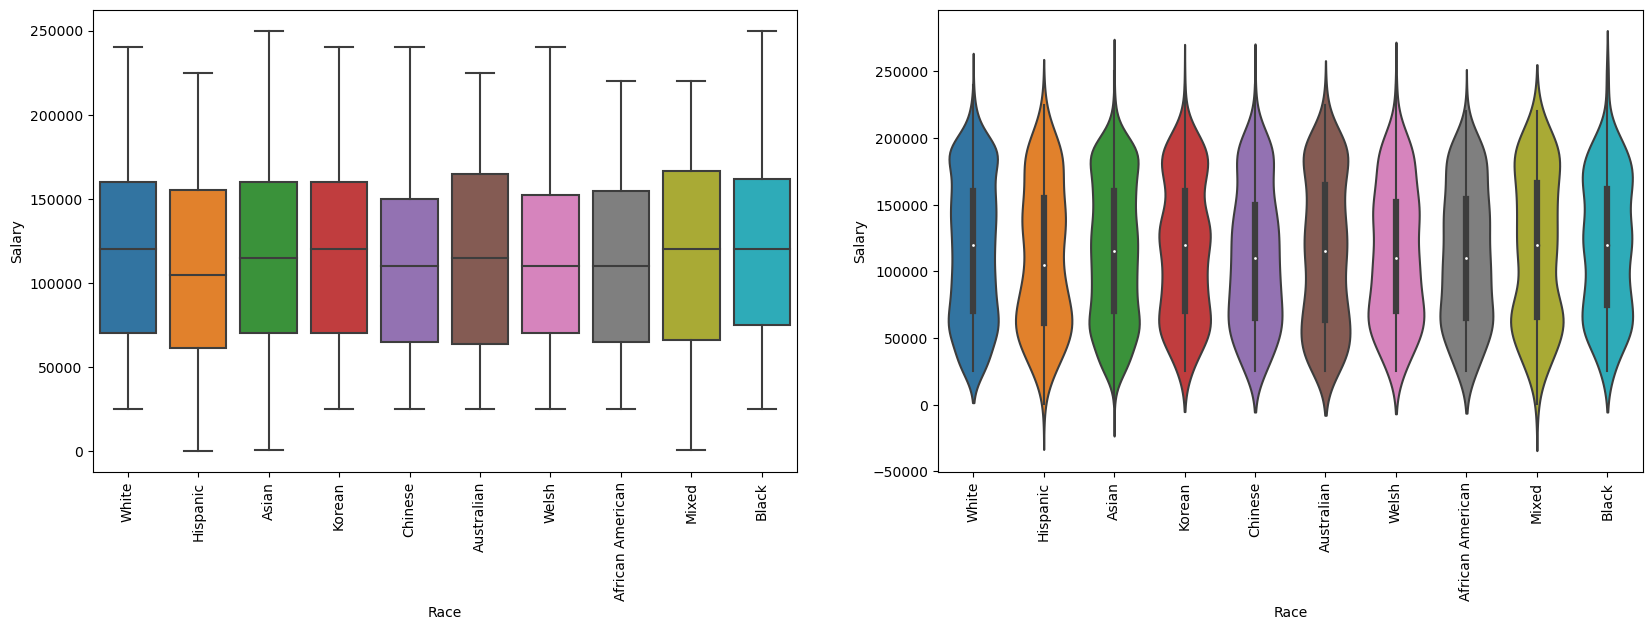

In [50]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)

The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from Hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in White, Australian, Black and Mixed race. Whereas the Hispanic has more concentration near 75k

## Data Preprocessing 2

### Label encoding to categorical features

In [51]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization   

In [52]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [53]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


In [54]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,2.019244,0,3,5,1.964544,1.604042,3,7
6700,-0.213129,1,1,10,-0.840811,-1.237628,0,2
6701,-0.475761,0,0,5,-0.675790,-1.142906,2,4
6702,1.625296,1,2,5,0.974419,0.467374,2,6
6703,-1.001025,0,1,10,-1.170853,-1.521795,1,3


## Coorelation Matrix Heatmap

<AxesSubplot:>

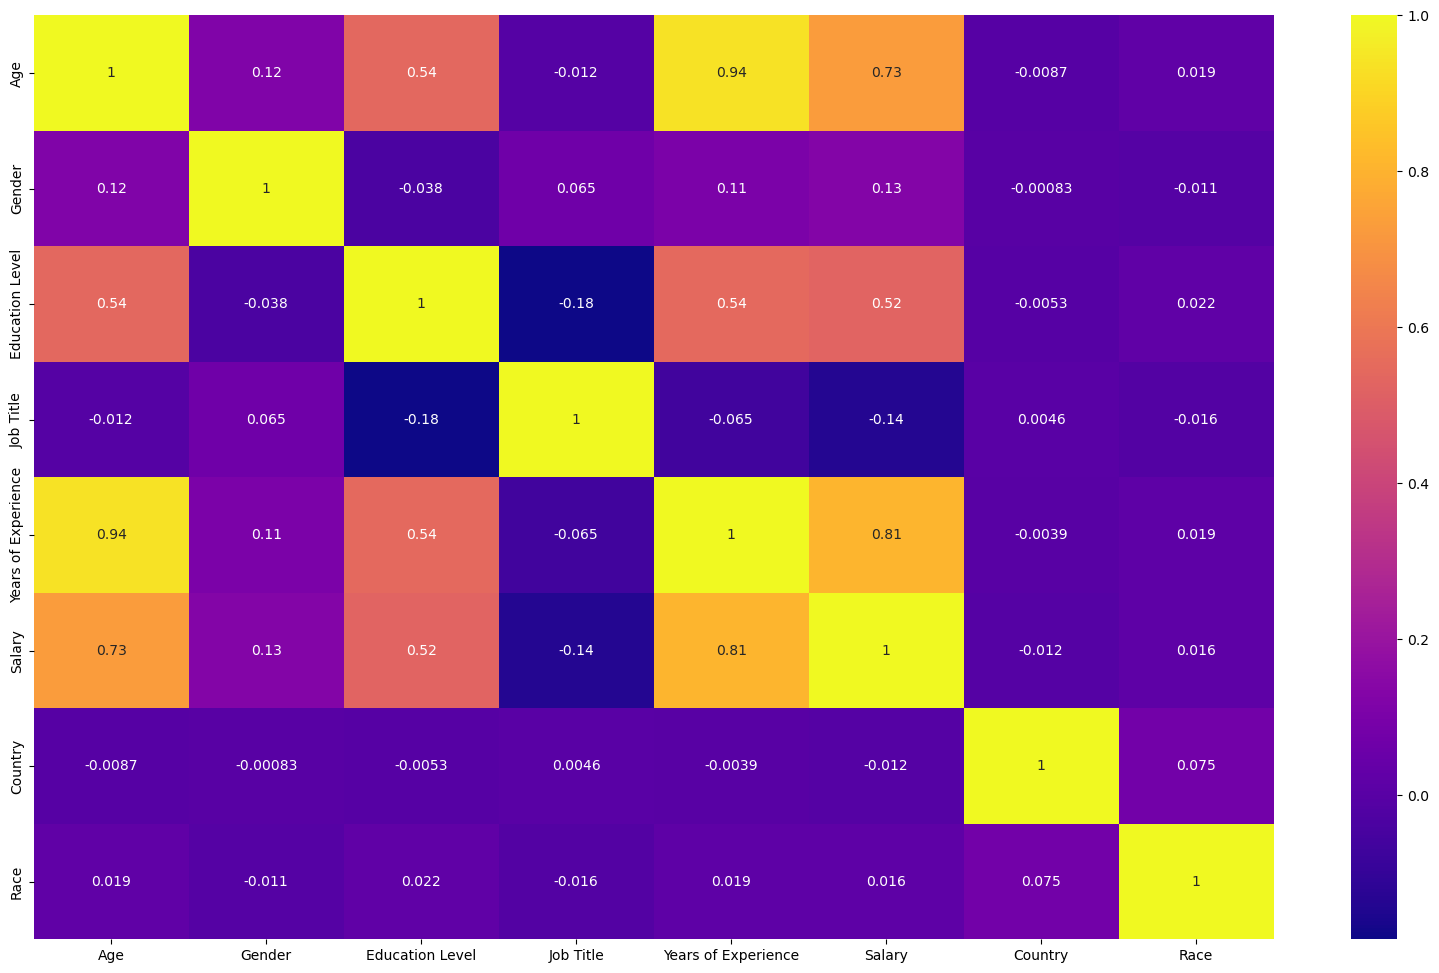

In [60]:
#coorelation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True, cmap='plasma')

In this coorelation matrix, there are three major coorealtions.
- Salary and Age
- Salary and Years of Experience
- Years of Experience and Age

The corelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

## Salary Prediction

I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

#### Hypertuning the model

In [63]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_cons

Building the model on best parameters

In [67]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Create a DecisionTreeRegressor with max_features='sqrt'
dtree = DecisionTreeRegressor(max_features='sqrt')

In [72]:
# Fit the model to the training data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_features='sqrt')

In [68]:
#fitting the training data
dtree.fit(X_train,y_train)

InvalidParameterError: The 'max_features' parameter of DecisionTreeRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [73]:
#training accuracy
dtree.score(X_train, y_train)

0.9931054587415588

In [74]:
#predicting the salary of an employee 
d_pred = dtree.predict(X_test)

## Evaluating the Decision Tree Regressor Model

In [75]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.656819
1,-0.745659,-0.784135
2,-0.290405,-0.290405
3,-1.048183,-1.048183
4,-0.669294,-0.669294
5,1.414598,1.509320
6,-0.820850,-0.820850
7,-1.142906,-1.105017
8,1.509320,1.537737
9,0.277930,0.309504


C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

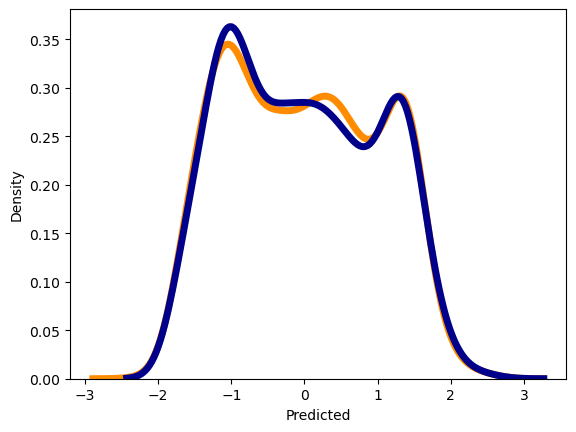

In [78]:
ax = sns.distplot(dft['Actual'], color = 'darkorange', hist = False, kde = True, kde_kws = {'linewidth': 5}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'darkblue', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 5}, label = 'Predicted')

The darkorange line shows the distribution count for 'actual' values. The darkblue line shows the distribution count for 'predicted' values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.8787407306986357
Mean Squared Error:  0.1240929332840154
Mean Absolute Error:  0.1687588817903968
RMSE: 0.35226826891449564


### Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [81]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
#training accuracy
rfg.score(X_train, y_train)

0.9881774635231672

In [83]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

## Evaluating Random Forest Regressor Model

In [84]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.653623
1,-0.745659,-0.699667
2,-0.290405,-0.303287
3,-1.048183,-1.049699
4,-0.669294,-0.650823
5,1.414598,1.498111
6,-0.820850,-0.813573
7,-1.142906,-1.110037
8,1.509320,1.537550
9,0.277930,0.314524


C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

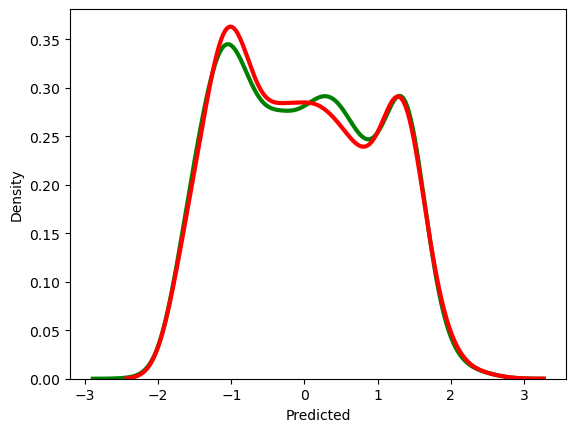

In [86]:
ax = sns.distplot(dft['Actual'], color = 'green', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

The green shows the distribution count for 'actual' values and the red line shows the distribution count for 'predicted' values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [87]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.946816521298891
Mean Squared Error:  0.05442630416868518
Mean Absolute Error:  0.11536680797090444
RMSE: 0.23329445807537988


## Conclusion

From the exploratory data analysis, it has been concluded that the salary of the employees is dependent upon the following factors:
1. **Years of Experience**
2. **Job Title**
3. **Education Level**

Employees with greater years of experience, having job title such as Data Analyst/Scientist, Software/Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, regressor models - Decision Tree Regressor and Random Forest Regressor have been used for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%